# **1 Implementing k-means on Spark**

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=df381e2480dbd00a413e1d3e7ffa0c25906177161ddae4f5b3de9740141633d9
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operatio

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import numpy as np
from operator import add
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# conf = SparkConf().setAppName("KMeans")
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [4]:
def eu_dis(a,b):
  a = switch(a)
  b = switch(b)
  a = np.array(a)
  b = np.array(b)
  return np.linalg.norm(a-b)

In [5]:
def man_dis(a,b):
  a = switch(a)
  b = switch(b)
  a = np.array(a)
  b = np.array(b)
  return np.linalg.norm(a-b,1)

In [6]:
def cost_function(C,bd,alg):
  if alg == 'man':
    return C.map(lambda x: man_dis(x[1],bd.value[x[0]])).reduce(add)
  else:
    return C.map(lambda x: np.square(eu_dis(x[1],bd.value[x[0]]))).reduce(add)

In [7]:
def switch(a):
  return [float(i) for i in a.split()]

In [8]:
def kmeans(X,C,k,max_iter,alg):
  cost = []
  for i in range(max_iter):
    bd = sc.broadcast(C.collect())
    if alg == 'man':
      closest_centroids = X.map(lambda x: (np.argmin([man_dis(x,c) for c in bd.value]), x))
    else:
      closest_centroids = X.map(lambda x: (np.argmin([eu_dis(x,c) for c in bd.value]), x))
    cost.append(cost_function(closest_centroids,bd,alg))
    new_centroids = closest_centroids.map(lambda x: (x[0],switch(x[1]))).groupByKey().mapValues(list).map(lambda x: sum_list(x[1]))
    C = new_centroids
  return C.collect(),cost

In [9]:
def sum_list(a):
  sum = a[0]
  for i in a[1:]:
    for j in range(len(i)):
      sum[j] += i[j]
  for k in range(len(sum)):
    sum[k] = str(sum[k]/len(a))
  sumstr = ' '.join(sum)
  return sumstr


In [28]:
import numpy as np

A = np.array([[1,1,1],[1,0,1],[0,1,0]])

h = np.array([[1/np.sqrt(3)],[1/np.sqrt(3)],[1/np.sqrt(3)]])
a = np.array([[1/np.sqrt(3)],[1/np.sqrt(3)],[1/np.sqrt(3)]])



def power_iter(A,h,a):
    h = A@a/np.linalg.norm(A@a)
    a = A.T@h/np.linalg.norm(A.T@h)
#     lla = 1/np.linalg.norm(h,ord = 2)
#     miu = 1/np.linalg.norm(a,ord = 2)
#     h = lla*h
#     a = miu*a
    print('h',h)
    print('a',a)
    return h ,a

i = 0
while i < 3:
    h,a = power_iter(A,h,a)
    i += 1
    
print(np.linalg.eig(A.T@A))

h [[0.80178373]
 [0.53452248]
 [0.26726124]]
a [[0.61545745]
 [0.49236596]
 [0.61545745]]
h [[0.79259392]
 [0.56613852]
 [0.22645541]]
a [[0.62469505]
 [0.46852129]
 [0.62469505]]
h [[0.78975397]
 [0.57436653]
 [0.21538745]]
a [[0.62709344]
 [0.46206885]
 [0.62709344]]
(array([4.73205081e+00, 1.95664611e-16, 1.26794919e+00]), array([[-6.27963030e-01, -7.07106781e-01,  3.25057584e-01],
       [-4.59700843e-01,  3.41960338e-16, -8.88073834e-01],
       [-6.27963030e-01,  7.07106781e-01,  3.25057584e-01]]))


In [6]:
a = 14*0.58**2
3*0.58/np.sqrt(a)

0.8017837257372731

## **(a) 1.**

In [1]:
rdd = sc.textFile("data.txt")
centroid_1 = sc.textFile("c1.txt")
centroid_2 = sc.textFile("c2.txt")

NameError: name 'sc' is not defined

In [11]:
final_centroid_c1 = kmeans(rdd,centroid_1,k = 10,max_iter = 20,alg = 'eu')
final_centroid_c2 = kmeans(rdd,centroid_2,k = 10,max_iter = 20,alg = 'eu')

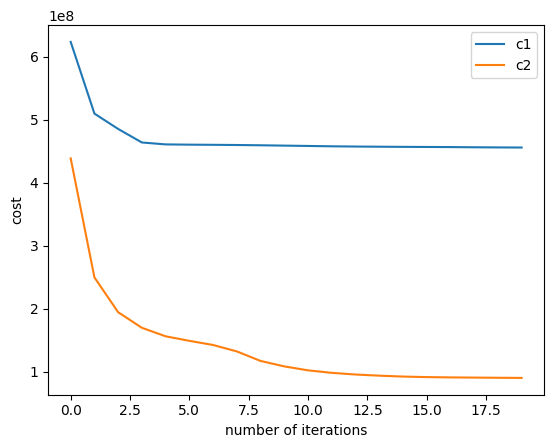

In [18]:
max_iter = 20
plt.plot(range(max_iter),final_centroid_c1[1],label = 'c1')
plt.plot(range(max_iter),final_centroid_c2[1],label = 'c2')
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.legend()
plt.savefig('eu.jpg')

## **(a) 2.**

In [ ]:
cost_c1 = (final_centroid_c1[1][0] - final_centroid_c1[1][10])/final_centroid_c1[1][0]
cost_c2 = (final_centroid_c2[1][0] - final_centroid_c2[1][10])/final_centroid_c2[1][0]
print('cost of c1:', cost_c1)
print('cost of c2:', cost_c2)

cost of c1: 0.2648391714456055
cost of c2: 0.7669795594605946


## **(b) 1.**

In [14]:
man_c1 = kmeans(rdd,centroid_1,k = 10,max_iter = 20,alg = 'man')
man_c2 = kmeans(rdd,centroid_2,k = 10,max_iter = 20,alg = 'man')

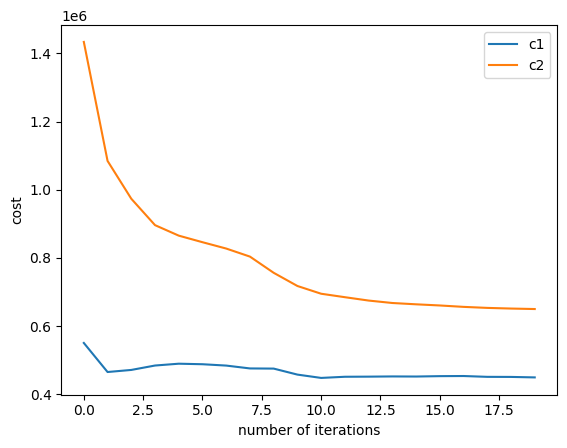

In [19]:
max_iter = 20
plt.plot(range(max_iter),man_c1[1],label = 'c1')
plt.plot(range(max_iter),man_c2[1],label = 'c2')
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.savefig('man.jpg')

## **(b) 2.**

In [ ]:
cost_c1 = (man_c1[1][0] - man_c1[1][10])/man_c1[1][0]
cost_c2 = (man_c2[1][0] - man_c2[1][10])/man_c2[1][0]
print('cost of c1:', cost_c1)
print('cost of c2:', cost_c2)

cost of c1: 0.1865492611679923
cost of c2: 0.515540991023891


# **2 RecommenderSystems**

## **(d)**

In [ ]:
R = np.loadtxt('user-shows.txt')
shows = np.loadtxt('shows.txt',delimiter='\n',dtype=str)
R.shape

(9985, 563)

### **(1)**

In [ ]:
def gen_P(R):
  row_sum = []
  for i in range(R.shape[0]):
    row_sum.append(sum(R[i]))
  P = np.diag(row_sum)
  return P

def gen_Q(R):
  col_sum = []
  for i in range(R.shape[1]):
    col_sum.append(sum(R.T[i]))
  Q = np.diag(col_sum)
  return Q

In [ ]:
P = gen_P(R)

In [ ]:
Q = gen_Q(R)

### **(2)**

In [ ]:
def user_user(R,P,Q):
  PS = np.diagonal(P)**(-0.5)
  PS = np.diag(PS)
  return PS@R@R.T@PS@R

In [ ]:
T_user = user_user(R,P,Q)

In [ ]:
sim = {}
iter = 0
for i in T_user.T[:100]:
  sim[iter] = i[499]
  iter += 1
high_sim_user = sorted(sim.items(), key=lambda item: item[1], reverse = True)[:5]

In [ ]:
for i in high_sim_user:
  print(shows[i[0]],',',i[1])

"FOX 28 News at 10pm" , 908.480053476128
"Family Guy" , 861.1759992873301
"2009 NCAA Basketball Tournament" , 827.6012954743583
"NBC 4 at Eleven" , 784.7819589039739
"Two and a Half Men" , 757.6011181024228


### **(3)**

In [ ]:
def item_item(R,Q,P):
  QS = np.diagonal(Q)**(-0.5)
  QS = np.diag(QS)  
  return R@QS@R.T@R@QS

In [ ]:
T_item = item_item(R,Q,P)

In [ ]:
sim = {}
iter = 0
for i in T_item.T[:100]:
  sim[iter] = i[499]
  iter += 1
high_sim_item = sorted(sim.items(), key=lambda item: item[1], reverse = True)[:5]

In [ ]:
for i in high_sim_item:
  print(shows[i[0]],',',i[1])

"FOX 28 News at 10pm" , 31.364701678342396
"Family Guy" , 30.001141798877764
"NBC 4 at Eleven" , 29.396797773402543
"2009 NCAA Basketball Tournament" , 29.22700156150048
"Access Hollywood" , 28.971277674055564
